# Mistral 7B Instruct with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Mistral 7B Instruct with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import mistral_instructions_v213
MODEL_ID = "mistral.mistral-7b-instruct-v0:2"
SYSTEM_PROMPT = mistral_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 2
INFO:root:Completed: 4
INFO:root:Completed: 1
INFO:root:Completed: 0
INFO:root:Completed: 3
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 10
ERROR:root:No valid JSON block found in response text. Response:  json
{
  "overruled": "no",
  "confidence": 0.995,
  "rationale": "The passage discusses two cases, Hagood v. Southern and the current case, but it does not provide any clear negative actions against the Target Case (Hagood v. Southern). The passage only explains the legal principles established in Hagood v. Southern and how they apply to the current case."
INFO:root:Completed: 12
INFO:root:Completed: 14
INFO:

CPU times: user 1min 12s, sys: 5.05 s, total: 1min 17s
Wall time: 12min 22s


[{'0003.91306_cites_87633.txt': {'model': 'mistral.mistral-7b-instruct-v0:2',
   'input_tokens': 2432,
   'output_tokens': 71,
   'prediction': 'no',
   'confidence': 0.995,
   'rationale': 'The passage discusses the Target Case but does not provide any indication of Explicit or Implicit Negative Actions. The Target Case is not overruled.',
   'raw_results': ' json\n{\n  "overruled": "no",\n  "confidence": 0.995,\n  "rationale": "The passage discusses the Target Case but does not provide any indication of Explicit or Implicit Negative Actions. The Target Case is not overruled."\n}'}},
 {'0005.91306_cites_88693.txt': {'model': 'mistral.mistral-7b-instruct-v0:2',
   'input_tokens': 2391,
   'output_tokens': 104,
   'prediction': 'no',
   'confidence': 0.995,
   'rationale': 'The passage acknowledges that the Target Case did not hold that the repealing act was absolutely void and that the title of the State could not be divested in all cases. The passage also implies that the Target Case 

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0003.91306_cites_87633.txt,mistral.mistral-7b-instruct-v0:2,2432.0,71.0,no,0.995,The passage discusses the Target Case but does...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
1,0005.91306_cites_88693.txt,mistral.mistral-7b-instruct-v0:2,2391.0,104.0,no,0.995,The passage acknowledges that the Target Case ...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
2,0002.91306_cites_88994.txt,mistral.mistral-7b-instruct-v0:2,2933.0,123.0,0,0.990,"The passage discusses the Target Case, Vermily...","json\n{\n ""overruled"": ""0"",\n ""confidence"":..."
3,0001.91306_cites_88061.txt,mistral.mistral-7b-instruct-v0:2,3250.0,135.0,partially,0.995,The passage discusses the case of Texas v. Whi...,"json\n{\n ""overruled"": ""partially"",\n ""conf..."
4,0004.91306_cites_88240.txt,mistral.mistral-7b-instruct-v0:2,2386.0,157.0,no,1.000,The passage discusses the Target Case and its ...,"s of the language used in the act of 1862, an..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/4.mistral/0.mistral_7B_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

161

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/4.mistral/0.mistral_7B_v213_prompt.csv")

In [9]:
retry = prediction_df[prediction_df["prediction"].isna()]
len(retry)

50

In [10]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:root:Completed: 331
INFO:root:Completed: 320
INFO:root:Completed: 244
INFO:root:Completed: 349
INFO:root:Completed: 359
ERROR:root:No valid JSON block found in response text. Response:  json
{
  "overruled": "no",
  "confidence": 0.995,
  "rationale": "The passage does not contain any Explicit or Implicit Negative Actions related to the Target Case. The passage simply mentions the Target Case as one of several cases that have established the principle of freedom of the press."
INFO:root:Completed: 403
INFO:root:Completed: 395
INFO:root:Completed: 441
ERROR:root:No valid JSON block found in response text. Response:  json
{
  "overruled": "no",
  "confidence": 0.995,
  "rationale": "The passage discusses the Target Case, Pennoyer v. Neff, but it does not provide any clear evidence of Explicit or Implicit Negative Actions. The passage mentions that the Target Case is a controlling precedent and that it was found not applicable to the unique interests and factors pertaining to the sev

CPU times: user 3.24 s, sys: 178 ms, total: 3.42 s
Wall time: 15.7 s


[{'0318.103870_cites_96230.txt': {'model': 'mistral.mistral-7b-instruct-v0:2',
   'input_tokens': 2405,
   'output_tokens': 69,
   'prediction': 'no',
   'confidence': 0.995,
   'rationale': 'The passage discusses several cases, but it does not provide any clear negative actions related to the Target Case. The passage does not overrule the Target Case.',
   'raw_results': ' json\n{\n  "overruled": "no",\n  "confidence": 0.995,\n  "rationale": "The passage discusses several cases, but it does not provide any clear negative actions related to the Target Case. The passage does not overrule the Target Case."\n}'}},
 {'0319.103870_cites_1303501.txt': {'model': 'mistral.mistral-7b-instruct-v0:2',
   'input_tokens': 2406,
   'output_tokens': 78,
   'prediction': 'no',
   'confidence': 0.995,
   'rationale': 'The passage mentions the Target Case but does not provide any indication of Explicit or Implicit Negative Actions. The passage discusses the Target Case in the context of other cases and 

In [11]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0318.103870_cites_96230.txt,mistral.mistral-7b-instruct-v0:2,2405.0,69.0,no,0.995,"The passage discusses several cases, but it do...","json\n{\n ""overruled"": ""no"",\n ""confidence""..."
1,0319.103870_cites_1303501.txt,mistral.mistral-7b-instruct-v0:2,2406.0,78.0,no,0.995,The passage mentions the Target Case but does ...,"json\n{\n ""overruled"": ""no"",\n ""confidence"": ..."
2,0233.103493_cites_98694.txt,mistral.mistral-7b-instruct-v0:2,2596.0,88.0,0,1.000,The passage does not provide enough informatio...,"json\n{\n ""overruled"": ""0"",\n ""confidence"":..."
3,0345.103962_cites_3981612.txt,mistral.mistral-7b-instruct-v0:2,3630.0,76.0,no,1.000,The passage does not contain any Explicit or I...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
4,0355.2764117_cites_103096.txt,mistral.mistral-7b-instruct-v0:2,5516.0,101.0,no,1.000,The passage discusses the case of Stoll v. Got...,"{\n""overruled"": ""no"",\n""confidence"": 1.0,\n""r..."


In [12]:
retry_df["prediction"].isna().sum()

13

In [13]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [14]:
prediction_df = comb_prediction_df

In [15]:
len(prediction_df)

1084

In [16]:
prediction_df["prediction"].isna().sum()

13

In [17]:
prediction_df.to_csv("predictions/4.mistral/0.mistral_7B_v213_prompt.csv", index=False)

In [25]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/4.mistral/0.mistral_7B_v213_prompt.csv")

In [26]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [27]:
assert len(df) == len(prediction_df)

In [28]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,mistral.mistral-7b-instruct-v0:2,3250.0,135.0,yes,0.995,The passage discusses the case of Texas v. Whi...,"json\n{\n ""overruled"": ""partially"",\n ""conf..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,mistral.mistral-7b-instruct-v0:2,2933.0,123.0,no,0.990,"The passage discusses the Target Case, Vermily...","json\n{\n ""overruled"": ""0"",\n ""confidence"":..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,mistral.mistral-7b-instruct-v0:2,2432.0,71.0,no,0.995,The passage discusses the Target Case but does...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,mistral.mistral-7b-instruct-v0:2,2386.0,157.0,no,1.000,The passage discusses the Target Case and its ...,"s of the language used in the act of 1862, an..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,mistral.mistral-7b-instruct-v0:2,2391.0,104.0,no,0.995,The passage acknowledges that the Target Case ...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."


# Run evaluation

In [29]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [30]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [31]:
eval_df["prediction"].value_counts()

prediction
no     924
yes    160
Name: count, dtype: int64

In [32]:
eval_df["input_tokens"].sum()

4057785.0

In [33]:
eval_df["output_tokens"].sum()

115048.0

In [34]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [35]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.90      0.89      0.89       935
         Yes       0.34      0.36      0.35       149

    accuracy                           0.81      1084
   macro avg       0.62      0.62      0.62      1084
weighted avg       0.82      0.81      0.82      1084



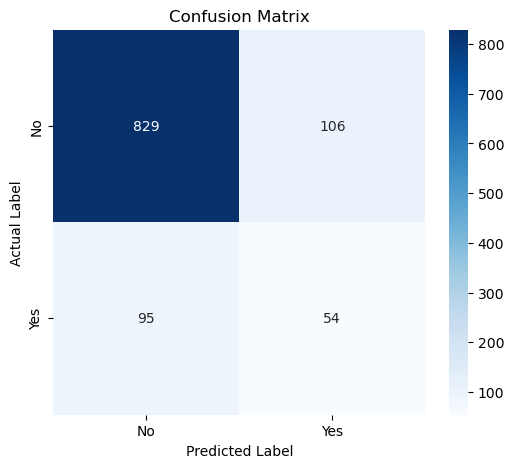

In [36]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [37]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.81
Precision: 0.34
Recall: 0.36
F-score: 0.35
Specificity: 0.89
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 54
True negatives: 829
False positives: 106
False negatives: 95


In [38]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

106

In [39]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

95

# Save the evaluation df

In [40]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,mistral.mistral-7b-instruct-v0:2,3250.0,135.0,yes,0.995,The passage discusses the case of Texas v. Whi...,"json\n{\n ""overruled"": ""partially"",\n ""conf..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,mistral.mistral-7b-instruct-v0:2,2933.0,123.0,no,0.990,"The passage discusses the Target Case, Vermily...","json\n{\n ""overruled"": ""0"",\n ""confidence"":..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,mistral.mistral-7b-instruct-v0:2,2432.0,71.0,no,0.995,The passage discusses the Target Case but does...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,mistral.mistral-7b-instruct-v0:2,2386.0,157.0,no,1.000,The passage discusses the Target Case and its ...,"s of the language used in the act of 1862, an..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,mistral.mistral-7b-instruct-v0:2,2391.0,104.0,no,0.995,The passage acknowledges that the Target Case ...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."


In [41]:
eval_df.to_csv("predictions/4.mistral/0.mistral_7B_v213_prompt_eval.csv", index=False)